
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Felicidades Efren! Tu trabajo es excelente. 

Has completado todos los items necesarios para aprobar la entrega.

Sigue así!

</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

En general:
En este proyecto se requiere conocer cual de las dos tarifas generó más ingresos en 2018 entre las dos tarifas de prepago, Surf y Ultimate. Habría que revisrar y preparar los datos, analizar cuanto pagó cada cliente para poder conocer después, que tarifa genera más ingresos mediante pruebas de hipótesis

## Inicialización

In [1]:
from scipy import stats as st # Librerías a utilizar
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo al separar la importación de bibliotecas de la carga de los datasets! Esto mejora la estructura y claridad de tu código.

</div>

## Cargar datos

In [2]:
llamadas = pd.read_csv('/datasets/megaline_calls.csv') #Se cargan los archivos de datos en diferentes DataFrames
internet = pd.read_csv('/datasets/megaline_internet.csv') 
mensajes = pd.read_csv('/datasets/megaline_messages.csv')
tarifas = pd.read_csv('/datasets/megaline_plans.csv')
usuarios = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

En primer instancia, se revisará la información general de los DataFrames para poder visualizar si hay datos nulos, el tipo de dato por columna, etc.

## Tarifas

In [3]:
tarifas.info() # Imprime la información general/resumida sobre el DataFrame de las tarifas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
tarifas.head() # Imprime una muestra de los datos para las tarifas

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


No observo datos austenes, ni tipo de datos no adecuados. Pero sí observo que el tráfico web incluidos en los paquetes (mb_per_month_included) está en MB pero la tarifa es por GB, modificaré la columna para que estén en GB, que es en la unidad que se realiza el cobro por paquete.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy buen uso de métodos como _info_ y _head_ para la exploración de datos. Esto te permitió identificar rápidamente la estructura y posibles problemas de los datos.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Como mejora, puedes complementar con análisis de valores únicos o distribuciones preliminares de variables clave.

</div>

</div>

## Corregir datos

Realizo las acciones:

In [5]:
tarifas['mb_per_month_included'] = tarifas['mb_per_month_included'].replace({15360: 15, 30720: 30}) #Cambio la columna de tráfico web de MB a GB
tarifas.rename(columns={'mb_per_month_included': 'gb_per_month_included'}, inplace=True) #Cambio el nombre de la columna
tarifas

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


## Enriquecer los datos

No tuve que realizar algo adicional.

## Usuarios/as

In [6]:
usuarios.info() # Imprime la información general/resumida sobre el DataFrame de usuarios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
muestra_aleatoria_usuarios = usuarios.sample(n=100) #Extraigo una muestra aleatoria de 100 datos
muestra_aleatoria_usuarios.head() # Imprime una muestra de datos para usuarios

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
112,1112,Amal,Pacheco,18,"Grand Rapids-Kentwood, MI MSA",2018-10-08,ultimate,NaN
271,1271,Darrin,Rose,48,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-24,surf,NaN
390,1390,Deloras,Strickland,61,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-03-11,ultimate,NaN
397,1397,Willow,Steele,70,"Oklahoma City, OK MSA",2018-06-01,surf,NaN
289,1289,Steve,Blair,47,"Detroit-Warren-Dearborn, MI MSA",2018-11-12,ultimate,NaN


Observo datos ausentes en la columna churn_date pero, no creo que haya ningpun incoveniente, pues son los usuarios que aún cuentan con el servicio. Por los tipos de datos, las fechas están como tipo object, se cambiará a datetime. 

### Corregir los datos

Realizo las acciones:

In [8]:
usuarios['reg_date'] = pd.to_datetime(usuarios['reg_date'], format='%Y-%m-%d') #Cambio el tipo de dato de la columna reg_date
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

### Enriquecer los datos

No tuve que realizar algo adicional.

## Llamadas

In [9]:
llamadas.info() # Imprime la información general/resumida sobre el DataFrame de las llamadas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
muestra_aleatoria_llamadas = llamadas.sample(n=100) #Extraigo una muestra aleatoria de 100 datos
muestra_aleatoria_llamadas.head() # Imprime una muestra de datos para las llamadas

,id,user_id,call_date,duration
82257,1298_3,1298,2018-12-29,6.78
115489,1404_283,1404,2018-10-14,9.41
73635,1261_405,1261,2018-08-31,5.03
3224,1011_77,1011,2018-09-04,3.30
118240,1412_524,1412,2018-10-12,18.52


No se observo datos nulos. La columna call_date está como tipo object, se cambiará a datetime. 

### Corregir los datos

Realizo las acciones:

In [11]:
llamadas['call_date'] = pd.to_datetime(llamadas['call_date'], format='%Y-%m-%d') #Cambio de tipo de dato de la columna call_date
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

Debido a que se pide información por mes, extraigo el mes de la fecha de la llamada, además, el costo de la llamada se cobra redondeando los minutos al entero superior por lo que buscaré cambiar la columna duration a su entero superior. 

In [12]:
llamadas['dt_months'] = llamadas['call_date'].dt.month #Se agrega la columna del mes de la llamada
llamadas['duration'] = llamadas['duration'].astype(int) + 1 #Se redondea la columna duration al entero superior
llamadas.head()

,id,user_id,call_date,duration,dt_months
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Para este cambio puedes usar el método _ceil_ ;)

</div>

## Mensajes

In [13]:
mensajes.info() # Imprime la información general/resumida sobre el DataFrame de los mensajes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
muestra_aleatoria_mensajes = mensajes.sample(n=100) #Extraigo una muestra aleatoria de 100 datos
muestra_aleatoria_mensajes.head() # Imprime una muestra de datos para los mensajes

,id,user_id,message_date
27752,1172_209,1172,2018-12-11
43892,1293_280,1293,2018-11-24
69597,1453_45,1453,2018-12-22
73384,1470_1012,1470,2018-10-12
74479,1478_7,1478,2018-09-20


No se observan datos nulos. La columna message_date está como tipo object, se cambiará a datetime 

### Corregir los datos

Realizo las acciones:

In [15]:
mensajes['message_date'] = pd.to_datetime(mensajes['message_date'], format='%Y-%m-%d') #Cambio de tipo de dato de la columna call_date
mensajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

Debido a que se pide información por mes, extraigo el mes de la fecha de los mensajes

In [16]:
mensajes['dt_months'] = mensajes['message_date'].dt.month #Se agrega la columna del mes del SMS
mensajes.head()

,id,user_id,message_date,dt_months
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [17]:
internet.info() # Imprime la información general/resumida sobre el DataFrame de internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
muestra_aleatoria_internet = internet.sample(n=100) #Extraigo una muestra aleatoria de 100 datos
muestra_aleatoria_internet.head() # Imprime una muestra de datos para el tráfico de internet

,id,user_id,session_date,mb_used
22809,1105_39,1105,2018-11-12,825.81
65646,1302_192,1302,2018-10-26,164.34
91564,1422_95,1422,2018-12-23,0.00
69233,1322_146,1322,2018-08-24,37.97
4275,1027_103,1027,2018-08-23,337.07


No observo datos nulos. La columna session_date está como tipo object, se cambairá a datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [19]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d') #Cambio de tipo de dato de la columna call_date
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

Debido a que se pide información por mes, extraigo el mes de la fecha del tráfico web. Además, agrego una nueva columna convirtiendo los mg usados a gb, debido a que las tarifas se cobran de esta forma

In [20]:
internet['dt_months'] = internet['session_date'].dt.month #Se agrega la columna del mes del tráfico web
internet['gb_used'] = internet['mb_used'] / 1024 #Convertimos los megabytes a gygabytes usados en la columna gb_used
internet.head()

,id,user_id,session_date,mb_used,dt_months,gb_used
0,1000_13,1000,2018-12-29,89.86,12,0.087754
1,1000_204,1000,2018-12-31,0.00,12,0.000000
2,1000_379,1000,2018-12-28,660.40,12,0.644922
3,1000_413,1000,2018-12-26,270.99,12,0.264639
4,1000_442,1000,2018-12-27,880.22,12,0.859590


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Bien hecho, convertiste las columnas a los tipos de datos adecuados (fechas, enteros, etc.) e hiciste los cambios esperados. Esto evita errores en cálculos posteriores. 

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Como recomendación, documenta siempre por qué haces cada conversión para dejar trazabilidad.

</div>

</div>

## Estudiar las condiciones de las tarifas

1. Las llamadas se redondean de segundos al minuto más próximo
2. El tráfico web se redondea por mes, de MB a GB
   
- El costo de surf por mes es $20, incluye 50 SMS, 500 min y 15 GB.
    Extras: $10 por GB y $.03 por SMS y cada minuto
  
- El costo de ultimate por mes es $70, incluye 1000 SMS, 3000 min y 30 GB
    Extras: $7 por GB y $.01 por SMS y cada minuto 

In [21]:
tarifas # Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

In [22]:
llamadas_por_mes = (llamadas.groupby(['user_id', 'dt_months']).agg(calls_count=('id', 'count')).reset_index())# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
llamadas_por_mes.head()

,user_id,dt_months,calls_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [23]:
minutos_por_mes = (llamadas.groupby(['user_id', 'dt_months']).agg(total_duration=('duration', 'sum')).reset_index()) # Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutos_por_mes.head()

,user_id,dt_months,total_duration
0,1000,12,124
1,1001,8,187
2,1001,9,327
3,1001,10,413
4,1001,11,443


In [24]:
mensajes_por_mes = (mensajes.groupby(['user_id', 'dt_months']).agg(sms_count=('id', 'count')).reset_index())# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
mensajes_por_mes.head()

,user_id,dt_months,sms_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [25]:
gb_por_mes = (internet.groupby(['user_id', 'dt_months']).agg(total_gb=('gb_used', 'sum')).reset_index()) # Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
gb_por_mes['total_gb'] = gb_por_mes['total_gb'].astype(int) + 1 #Se redondea al entero siguiente, así se cobra en cada paquete
gb_por_mes.head()

,user_id,dt_months,total_gb
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19


Se fusionarán los datos por usuario:

In [26]:
usuario_mes = pd.merge(llamadas_por_mes, minutos_por_mes, on=['user_id', 'dt_months']) #Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
usuario_mes = pd.merge(usuario_mes, mensajes_por_mes, on=['user_id', 'dt_months'])
usuario_mes = pd.merge(usuario_mes, gb_por_mes, on=['user_id', 'dt_months'])
usuario_mes.head()

,user_id,dt_months,calls_count,total_duration,sms_count,total_gb
0,1000,12,16,124,11,2
1,1001,8,27,187,30,7
2,1001,9,49,327,44,14
3,1001,10,65,413,53,22
4,1001,11,64,443,36,19


<div class="alert alert-block alert-warning">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Para esta parte debes usar merges de tipo outer (usa el parámetro `how='outer'` dentro de merge). Si no, se pierden datos, te dejo un ejemplo.

Supongamos que hacemos el merge entre los dataframes:

    df_mensajes

| user_id | month | mensajes |
|---------|-------|----------|
|    1    |   2   |    10    |
|    2    |   2   |     4    |
|    3    |   3   |     5    |
|    3    |   4   |     5    |

    df_llamadas

| user_id | month | minutos_llamadas |
|----|-------|------------------|
| 2  |   2   |       120        |
| 3  |   4   |       200        |
| 4  |   5   |      1000        |

Nota que tenemos usuarios que solo realizaron mensajes (el usuario 1), solo realizaron llamadas (el usuario 4) y otro que un mes realizo mensajes pero no llamadas y al otro mes realizo llamadas solamente (el usuario 3).

Al hacer un `merge` por defecto en pandas (es decir, sin especificar el tipo de merge), se utiliza el tipo **inner join**. Esto significa que solo se incluirán las filas cuyos valores de las columnas usadas como llave (`user_id` y `month` en este caso) esté presente en **ambos** DataFrames.

    

Si hacemos `df_mensajes.merge(df_llamadas, on=['user_id', 'month'])` obtendremos:
    

| user_id | month | mensajes | minutos_llamadas |
|---------|-------|----------|------------------|
|    2    |   2   |     4    |       120        |
|    3    |   4   |     5    |       200        |


Solo se conservan las filas donde coinciden tanto `user_id` como `month` entre las dos tablas (usuarios 2 en mes 2 y usuario 3 en mes 4). Por lo tanto, el consumo que tenemos está incompleto, ya que los otros casos que no vienen en este resultado deberían conservarse para el cálculo de cuánto se les cobrará.

Si en cambio usamos `how='outer'`, se conserva **toda la información** de ambas tablas, y se rellenan los valores faltantes con `NaN`. El resultado de `df_mensajes.merge(df_llamadas, on=['user_id', 'month'], how='outer')` es


| user_id | month | mensajes | minutos_llamadas |
|---------|-------|----------|------------------|
|    1    |   2   |    10    |       NaN        |
|    2    |   2   |     4    |       120        |
|    3    |   3   |     5    |       NaN        |
|    3    |   4   |     5    |       200        |
|    4    |   5   |   NaN    |      1000        |

Se incluyen todos los registros de ambos DataFrames. Cuando no hay coincidencias en las claves combinadas (`user_id` y `month`), los campos faltantes se completan con `NaN`. Esto permite tener todo el consumo.

Como conclusión:

- **`merge()` por defecto (`inner`)**: Devuelve solo las filas con coincidencia exacta entre los DataFrames.
- **`merge(..., how='outer')`**: Devuelve todas las filas de ambos DataFrames, incluyendo `NaN` donde no hay coincidencias.

Este tipo de operación es útil para ver tanto los datos coincidentes como los que están **solo en una de las tablas**, por ejemplo, para detectar información faltante o comparar actividad entre distintas fuentes. En este caso nos sirve para incluir todo el consumo y hacer el cálculo del cobro completo.
</div>

In [27]:
usuario_mes = usuario_mes.merge(usuarios[['user_id', 'plan']], on='user_id', how='left')  #Solo necesitamos user_id y plan
usuario_mes = usuario_mes.merge(tarifas, left_on='plan', right_on='plan_name', how='left') #Añade la información de la tarifa
usuario_mes.drop(columns=['plan_name'], inplace=True) #Ya se tiene la columna plan 
usuario_mes.head()

,user_id,dt_months,calls_count,total_duration,sms_count,total_gb,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16,124,11,2,ultimate,1000,30,3000,70,7,0.01,0.01
1,1001,8,27,187,30,7,surf,50,15,500,20,10,0.03,0.03
2,1001,9,49,327,44,14,surf,50,15,500,20,10,0.03,0.03
3,1001,10,65,413,53,22,surf,50,15,500,20,10,0.03,0.03
4,1001,11,64,443,36,19,surf,50,15,500,20,10,0.03,0.03


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Bien, en esta parte basta con el uso de left ya que la data de consumo de usuarios ya está completa.


</div>

Se calculará el ingreso por usuario:

In [28]:
# Calcula el ingreso mensual para cada usuario
usuario_mes['extra_minutes'] = np.where(usuario_mes['total_duration'] > usuario_mes['minutes_included'], usuario_mes['total_duration'] - usuario_mes['minutes_included'], 0) #Minutos extra
usuario_mes['extra_messages'] = np.where(usuario_mes['sms_count'] > usuario_mes['messages_included'], usuario_mes['sms_count'] - usuario_mes['messages_included'], 0) #Mensajes extra
usuario_mes['extra_gb'] = np.where(usuario_mes['total_gb'] > usuario_mes['gb_per_month_included'], usuario_mes['total_gb'] - usuario_mes['gb_per_month_included'], 0) #Tráfico web extra

usuario_mes['extra_minutes_cost'] = usuario_mes['extra_minutes'] * usuario_mes['usd_per_minute'] #Calcula cargos adicionales por llamada
usuario_mes['extra_messages_cost'] = usuario_mes['extra_messages'] * usuario_mes['usd_per_message'] #Calcula cargos adicionales por llamada
usuario_mes['extra_gb_cost'] = usuario_mes['extra_gb'] * usuario_mes['usd_per_gb'] #Calcula cargos adicionales por tráfico web

usuario_mes['total_cost'] = (usuario_mes['usd_monthly_pay'] + usuario_mes['extra_minutes_cost'] + usuario_mes['extra_messages_cost'] + usuario_mes['extra_gb_cost']).round(2)

usuario_mes.head()

,user_id,dt_months,calls_count,total_duration,sms_count,total_gb,plan,messages_included,gb_per_month_included,minutes_included,...,usd_per_gb,usd_per_message,usd_per_minute,extra_minutes,extra_messages,extra_gb,extra_minutes_cost,extra_messages_cost,extra_gb_cost,total_cost
0,1000,12,16,124,11,2,ultimate,1000,30,3000,...,7,0.01,0.01,0,0,0,0.0,0.00,0,70.00
1,1001,8,27,187,30,7,surf,50,15,500,...,10,0.03,0.03,0,0,0,0.0,0.00,0,20.00
2,1001,9,49,327,44,14,surf,50,15,500,...,10,0.03,0.03,0,0,0,0.0,0.00,0,20.00
3,1001,10,65,413,53,22,surf,50,15,500,...,10,0.03,0.03,0,3,7,0.0,0.09,70,90.09
4,1001,11,64,443,36,19,surf,50,15,500,...,10,0.03,0.03,0,0,4,0.0,0.00,40,60.00


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Calculaste correctamente las métricas mensuales por usuario (llamadas, SMS, datos e ingresos). Esto es clave para comparar planes.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Como práctica profesional, intenta empaquetar estos cálculos en funciones para reutilizarlos fácilmente.

</div>

</div>

## Estudia el comportamiento de usuario

Se realizarán algunos estadísticos:

### Llamadas

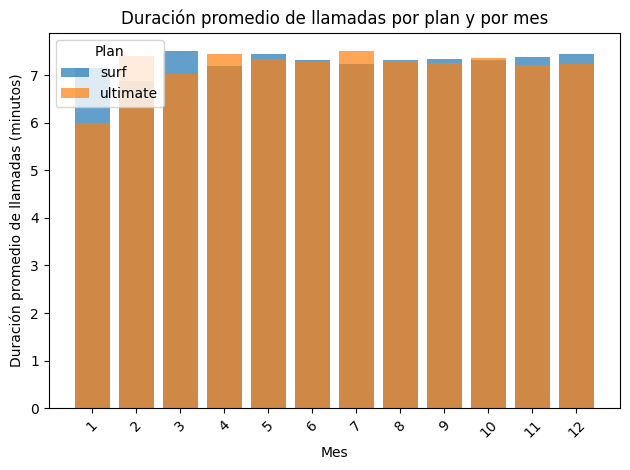

In [29]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
usuario_mes['avg_call_duration'] = (usuario_mes['total_duration'] / usuario_mes['calls_count']) #Calcula la duración promedio de las llamadas
avg_duration = (usuario_mes.groupby(['plan', 'dt_months']).agg(avg_call_duration=('avg_call_duration', 'mean')).reset_index()) # Agrupa por plan y mes para obtener el promedio general
avg_duration['dt_months'] = avg_duration['dt_months'].astype(str) #Cambio el tipo de dato
for plan in avg_duration['plan'].unique(): #Itera por cada plan en avg_duration
    plan_data = avg_duration[avg_duration['plan'] == plan] #Filtra las filas para cada plan
    plt.bar(plan_data['dt_months'], plan_data['avg_call_duration'], label=plan, alpha=0.7) #Traza el gráfico de barras

plt.title('Duración promedio de llamadas por plan y por mes') #Condiciones del gráfico
plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas (minutos)')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

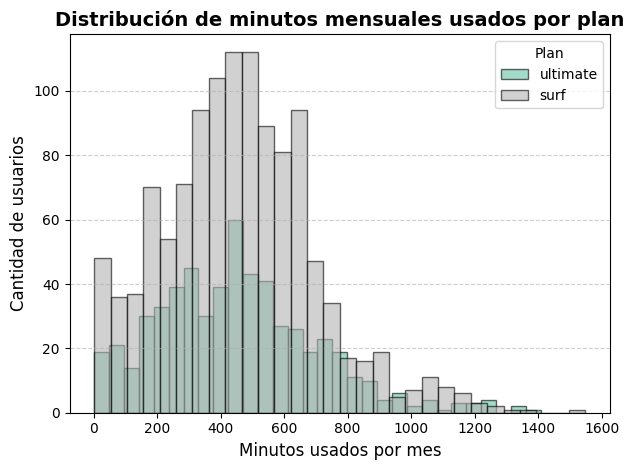

In [30]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
plans = usuario_mes['plan'].unique() #Itera por cada plan en usurio_mes
colors = plt.cm.Set2(np.linspace(0, 1, len(plans))) #Coloca colores por cada plan

for color, plan in zip(colors, plans): #Recorre los elementos por plan y color
    plt.hist(usuario_mes[usuario_mes['plan'] == plan]['total_duration'], bins=30, alpha=0.6, color=color, label=plan, edgecolor='black') #Crea el histograma

plt.title('Distribución de minutos mensuales usados por plan', fontsize=14, weight='bold') #Condiciones del gráfico
plt.xlabel('Minutos usados por mes', fontsize=12)
plt.ylabel('Cantidad de usuarios', fontsize=12)
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

In [31]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media_duracion = usuario_mes['total_duration'].mean() # Media (promedio general de minutos por mes)
varianza_duracion = usuario_mes['total_duration'].var() # Varianza (dispersión de los minutos)

print(f"Media de duración mensual de llamadas: {media_duracion:} minutos")
print(f"Varianza de la duración mensual de llamadas: {varianza_duracion:.2f}")

Media de duración mensual de llamadas: 457.36156907333714 minutos
Varianza de la duración mensual de llamadas: 60636.66


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Has calculado correctamente las métricas estadísticas básicas. Esto aporta una visión clara del comportamiento de los usuarios.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Como mejora, podrías complementar con percentiles o medianas, que a menudo son más robustas frente a valores extremos.

</div>

</div>

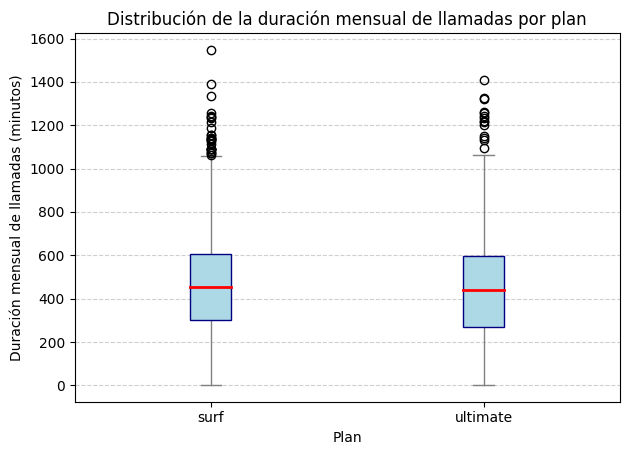

In [32]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
usuario_mes.boxplot(column='total_duration', by='plan', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='navy'), medianprops=dict(color='red', linewidth=2), whiskerprops=dict(color='gray'), capprops=dict(color='gray')) #Elabora el diagrama de caja

plt.title('Distribución de la duración mensual de llamadas por plan') #Condiciones del gráfico
plt.suptitle('')  #Elimina el título automático de pandas
plt.xlabel('Plan')
plt.ylabel('Duración mensual de llamadas (minutos)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- El promedio de duración de llamadas en mayor en el plan surf (8 de los 12 meses, aunque en algunos, es poca la diferencia).
- En ambos planes, la mayoría de usarios llaman entre 400-450 minutos aproximadamente, en el plan surf llegan hasta los 500 minutos. La media en general es de 457 minutos.
- Más usuarios del plan surf relizan llamadas.
- La mediana en general se observa similar.
- En ambos planes se observan datos atípicos superiores a aproximadamente 1050 minutos, sobrepasa los 500 minutos del plan surf.

En general, las llamadas no varían en función del plan

### Mensajes

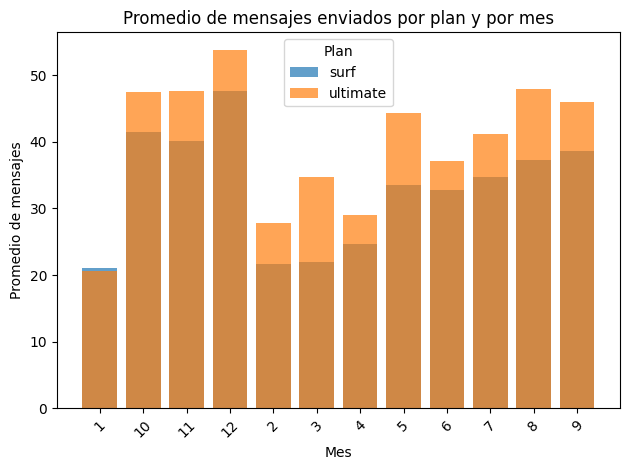

In [33]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
usuario_mes['dt_months'] = usuario_mes['dt_months'].astype(str) #Cambio de tipo de dato
avg_messages = usuario_mes.groupby(['plan', 'dt_months']).agg(avg_sms=('sms_count', 'mean')).reset_index() # Agrupa por plan y mes para obtener el promedio de mensajes

for plan in avg_messages['plan'].unique(): #Itera por cada plan en avg_messages
    plan_data = avg_messages[avg_messages['plan'] == plan] #Filtra las filas para cada plan
    plt.bar(plan_data['dt_months'], plan_data['avg_sms'], label=plan, alpha=0.7) # Crea el gráfico de barras

plt.title('Promedio de mensajes enviados por plan y por mes') #Condiciones del gráfico
plt.xlabel('Mes')
plt.ylabel('Promedio de mensajes')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
media_sms = usuario_mes['sms_count'].mean() # Media (promedio general de minutos por mes)
varianza_sms = usuario_mes['sms_count'].var() # Varianza (dispersión de los minutos)

print(f"Media de mensajes enviados mensualmente: {media_sms:} mensajes enviados")
print(f"Varianza de los mensajes enviados mensualmente: {varianza_sms:.2f}")

Media de mensajes enviados mensualmente: 41.78283115406481 mensajes enviados
Varianza de los mensajes enviados mensualmente: 1067.55


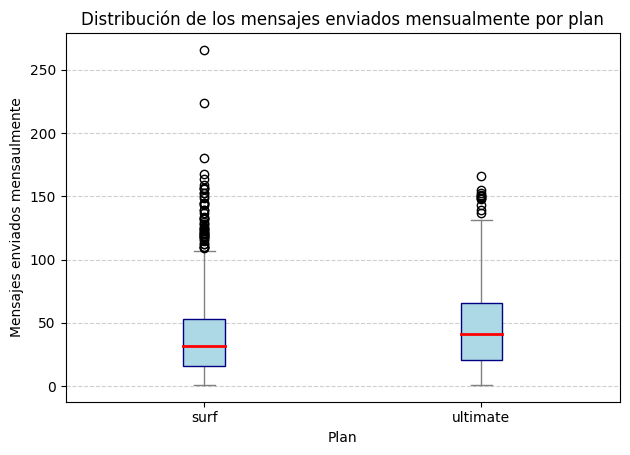

In [35]:
usuario_mes.boxplot(column='sms_count', by='plan', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='navy'), medianprops=dict(color='red', linewidth=2), whiskerprops=dict(color='gray'), capprops=dict(color='gray')) #Elabora el diagrama de caja

plt.title('Distribución de los mensajes enviados mensualmente por plan') #Condiciones del gráfico
plt.suptitle('')  # elimina el título automático de pandas
plt.xlabel('Plan')
plt.ylabel('Mensajes enviados mensaulmente')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- El promedio de mensajes enviados por mes, es mayor en 11 de los 12 meses en el plan ultimate.
- La media es de 42 mensajes por mes, menos de los 50 que contiene el plan surf.
- La mediana es mayor en el plan ultimate, aunque se observan más datos atípicos en el plan surf.

En general, los usuarios del plan ultimate realizan más mensajes que los del plan surf.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente, describiste de manera clara las distribuciones y sus implicaciones.

</div>

### Internet

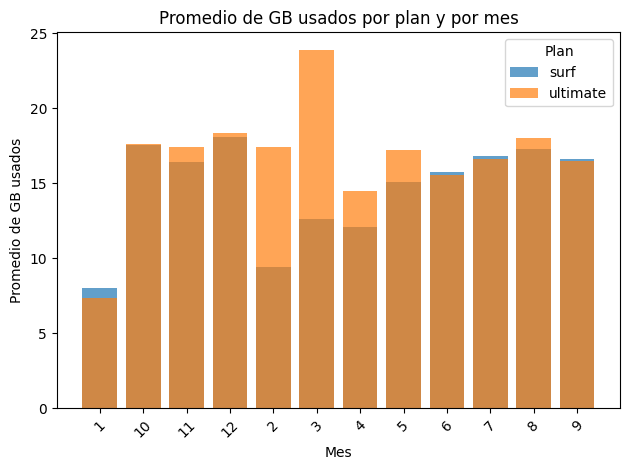

In [36]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
avg_gb = usuario_mes.groupby(['plan', 'dt_months']).agg(avg_gb=('total_gb', 'mean')).reset_index() # Agrupa por plan y mes para obtener el promedio de gb utilizados

# Crea el gráfico de barras
for plan in avg_gb['plan'].unique(): #Itera por cada plan en avg_gb
    plan_data = avg_gb[avg_gb['plan'] == plan] #Filtra las filas para cada plan
    plt.bar(plan_data['dt_months'], plan_data['avg_gb'], label=plan, alpha=0.7) # Crea el gráfico de barras

plt.title('Promedio de GB usados por plan y por mes') #Condiciones del gráfico
plt.xlabel('Mes')
plt.ylabel('Promedio de GB usados')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
media_gb = usuario_mes['total_gb'].mean() # Media (promedio general de minutos por mes)
varianza_gb = usuario_mes['total_gb'].var() # Varianza (dispersión de los minutos)

print(f"Media de mensajes enviados mensualmente: {media_gb:} gb usados")
print(f"Varianza de los mensajes enviados mensualmente: {varianza_gb:.2f}")

Media de mensajes enviados mensualmente: 16.94712905059693 gb usados
Varianza de los mensajes enviados mensualmente: 56.78


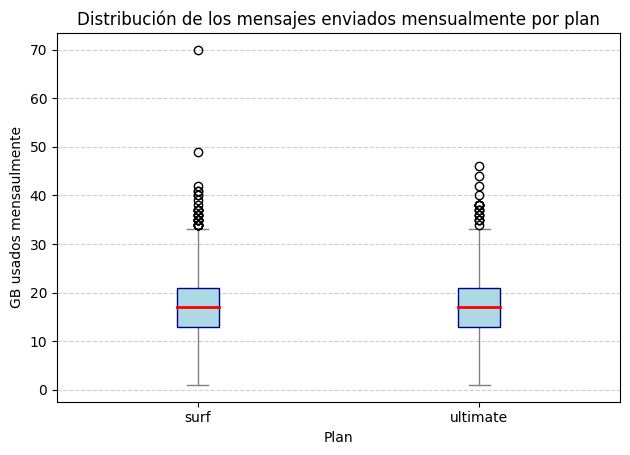

In [38]:
usuario_mes.boxplot(column='total_gb', by='plan', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='navy'), medianprops=dict(color='red', linewidth=2), whiskerprops=dict(color='gray'), capprops=dict(color='gray')) #Elabora el diagrama de caja

plt.title('Distribución de los mensajes enviados mensualmente por plan') #Condiciones del gráfico
plt.suptitle('')  # elimina el título automático de pandas
plt.xlabel('Plan')
plt.ylabel('GB usados mensaulmente')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- El promedio de GB utilizados por mes es mayor en 8 de los 12 meses en el plan ultimate, en uno de los meses es prácticamente el doble.
- El promedio de GB utilizados es de 17, mayor al que incluye el plan surf.
- Las medianas se observan similares, pero en el plan ultimate, los valores atípicos no sobrepasan los 50 GB que tiene el plan.

En general, no existe una variación entre los GB utilizados entre los planes, pero, habría que revisar el costo.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Bien hecho, todos los graficos son correctos y permiten visualizar las distribuciones y detectar sesgos o valores atípicos. 

</div>

## Ingreso

Estadísticas:

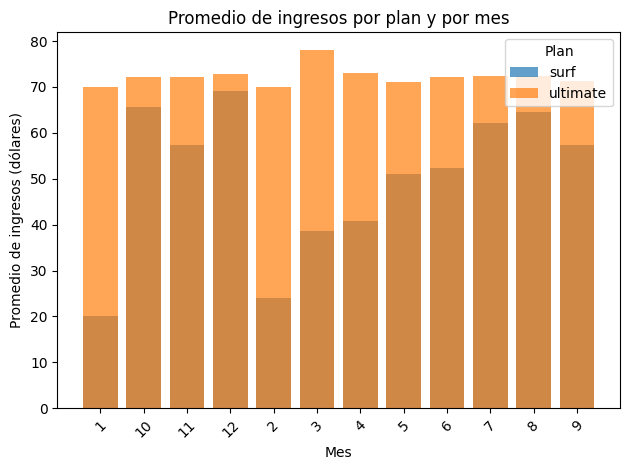

In [39]:
avg_ingreso = usuario_mes.groupby(['plan', 'dt_months']).agg(avg_ingreso=('total_cost', 'mean')).reset_index() # Agrupa por plan y mes para obtener el promedio del costo total


for plan in avg_ingreso['plan'].unique(): #Itera por cada plan en avg_ingreso
    plan_data = avg_ingreso[avg_ingreso['plan'] == plan] #Filtra las filas para cada plan
    plt.bar(plan_data['dt_months'], plan_data['avg_ingreso'], label=plan, alpha=0.7) # Crea el gráfico de barras

plt.title('Promedio de ingresos por plan y por mes') #Condiciones del gráfico
plt.xlabel('Mes')
plt.ylabel('Promedio de ingresos (dólares)')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
media_ingresos = usuario_mes['total_cost'].mean() # Media (promedio general de minutos por mes)
varianza_ingresos = usuario_mes['total_cost'].var() # Varianza (dispersión de los minutos)

print(f"Media de ingresos mensuales: {media_ingresos:.2f} dólares")
print(f"Varianza de los ingresos mensuales: {varianza_ingresos:.2f}")

Media de ingresos mensuales: 64.45 dólares
Varianza de los ingresos mensuales: 2002.57


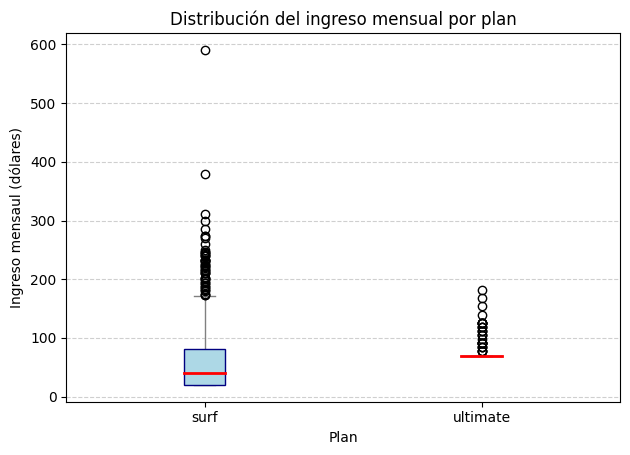

In [41]:
usuario_mes.boxplot(column='total_cost', by='plan', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='navy'), medianprops=dict(color='red', linewidth=2), whiskerprops=dict(color='gray'), capprops=dict(color='gray')) #Elabora el diagrama de caja

plt.title('Distribución del ingreso mensual por plan') #Condiciones del gráfico
plt.suptitle('')  # elimina el título automático de pandas
plt.xlabel('Plan')
plt.ylabel('Ingreso mensaul (dólares)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- Los ingresos promedio por plan por mes, son mayores en el plan ultimate en todos los meses.
- El promedio general es de 64.46 dólares, menor a la tarifa del plan ultimate pero tres veces mayor al plan surf.
- La mediana del plan ultimate es mayor a la del plan surf. Los valores atípicos son mayores en el plan surf.

En general, los ingresos del plan ultimate son mayores pero en el plan surf existe mucha variación entre el ingreso de sus usuarios.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Vemos que los planes se diferencian en el ingreso, a pesar de que el consumo de sus usuarios es muy similar. Esto ocurre porque la estructura de costos de cada plan define intervalos de consumo diferentes, para surf los usuarios tienden a salirse de esos rangos pero los de ultimate no.

</div>

## Prueba las hipótesis estadísticas

Pruebas de hipótesis:
H0 = Ingreso surf = Ingreso ultimate
H1 = Ingreso surf != Ingreso ultimate

- Son 2 poblaciones independientes.
- Se utilizará una prueba t de 2 muestras independientes.
- De 2 colas
- Nivel de significación del 5%

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Planteaste las hipótesis de manera formal y clara. Esto demuestra rigor metodológico.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Un consejo: escribe siempre las hipótesis en lenguaje estadístico y en lenguaje simple para mayor claridad.

</div>

</div>

In [42]:
surf = usuario_mes.loc[usuario_mes['plan'] == 'surf', 'total_cost'] #Filtra el costo de los usuarios del plan surf
ultimate = usuario_mes.loc[usuario_mes['plan'] == 'ultimate', 'total_cost'] #Filtra el costo de los usuarios del plan ultimate
alpha = .05

results = st.ttest_ind(surf, ultimate, equal_var=False) # Prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales
print('valor p:', results.pvalue)

if (results.pvalue < alpha):#Compara los valores p obtenidos con el nivel de significación estadística
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 1.5750870641816829e-12
Rechazamos la hipótesis nula


Pruebas de hipótesis:
H0 = Ingreso NY-NJ = Ingreso otras áreas
H1 = Ingreso NY-NJ != Ingreso otras área 

- Son 2 poblaciones independientes.
- Se utilizará una prueba t de 2 muestras independientes.
- De 2 colas
- Nivel de significación del 5%

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy bien, seleccionaste un test estadístico coherente y lo aplicaste correctamente.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Como mejora, explica siempre por qué elegiste ese test y qué supuestos tiene.

Además, recuerda que al realizar una prueba de hipótesis, es muy importante verificar los supuestos. El t-test que usaste funciona bien cuando se cumplen ciertos supuestos, como que las varianzas de ambos grupos (sábados lluviosos y no lluviosos) sean similares. Puedes realizar la prueba de levene para comprobar que los dos grupos tienen la misma varianza y, de esta forma, podrás saber el valor del parámetro equal_var que se debe utilizar en la función stats.ttest_ind.

</div>

</div>

In [43]:
usuario_mes = usuario_mes.merge(usuarios[['user_id', 'city']], on='user_id', how='left') #Agrega la ciudad de los usuarios
ny_nj_usarios = usuario_mes['city'].str.contains('NY-NJ', na=False) #Selecciona los usuarios del área de NY-NJ

ingresos_ny_nj_usarios = usuario_mes[ny_nj_usarios]['total_cost'] #Filtra el costo de los usuarios del área de NY-NJ
ingresos_no_ny_nj_usarios = usuario_mes[~ny_nj_usarios]['total_cost'] #Filtra el costo de los usuarios que no son del área de NY-NJ
alpha = .05

results = st.ttest_ind(ingresos_ny_nj_usarios, ingresos_no_ny_nj_usarios, equal_var=False) #Prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales
print('valor p:', results.pvalue)

if (results.pvalue < alpha):#Compara los valores p obtenidos con el nivel de significación estadística
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.004726696341649671
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Interpretaste los resultados con claridad, explicando su significado práctico.

Recuerda que la estadística es un medio, lo importante es qué significa para el negocio.

</div>

## Conclusión general

- Los ingresos entre los planes son distintos.
- De acuerdo al promedio entre meses por plan, los ingresos del plan ultimate son mayores.
- Los ingresos entre el área de NY-NJ y otras áreas son distintos.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy bien, sintetizaste los hallazgos y señalaste correctamente que el plan **Ultimate** es más rentable. Este es el punto culminante del proyecto.


</div>